In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.cvtColor(cv2.imread('1.png'), cv2.COLOR_BGR2RGB) # load the 128*128 images and convert the channels to RGB
img2 = cv2.cvtColor(cv2.imread('2.png'), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread('3.png'), cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(cv2.imread('4.png'), cv2.COLOR_BGR2RGB)
img5 = cv2.cvtColor(cv2.imread('5.png'), cv2.COLOR_BGR2RGB)
images = np.array([img1, img2, img3, img4, img5]) # put the 5 images into 1 array (the shape is: (5,128,128,3))

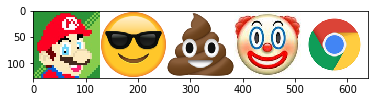

In [3]:
img_stack = np.hstack((img1, img2, img3, img4, img5)) # the images next to each other
plt.imshow(img_stack) # show the images

In [4]:
print(images) # the values of the images array

[[[[ 43 148  56]
   [ 43 148  56]
   [ 43 148  56]
   ...
   [ 42 145  53]
   [ 45 148  56]
   [ 42 147  54]]

  [[ 43 148  56]
   [ 43 148  56]
   [ 43 148  56]
   ...
   [ 45 148  56]
   [ 44 147  55]
   [ 44 147  55]]

  [[ 43 148  56]
   [ 43 148  56]
   [ 43 148  56]
   ...
   [ 44 148  53]
   [ 44 145  53]
   [ 46 147  55]]

  ...

  [[ 46 147  55]
   [ 42 145  53]
   [ 44 148  53]
   ...
   [ 43 148  56]
   [ 43 148  56]
   [ 43 148  56]]

  [[ 44 147  55]
   [ 44 147  55]
   [ 47 148  56]
   ...
   [ 43 148  56]
   [ 44 147  56]
   [ 44 147  55]]

  [[ 42 147  54]
   [ 45 148  56]
   [ 44 145  53]
   ...
   [ 43 148  56]
   [ 46 147  55]
   [ 46 147  55]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [5]:
mean = np.empty((5,3)) # array for the means
deviation = np.empty((5,3)) # array for the deviations
for i in range(5): # go through the images
    for j in range(3): # go through the channels
        mean[i][j] = np.mean(images[i,:,:,j]) # count the mean
        deviation[i][j] = np.std(images[i,:,:,j]) # count the deviation
print(mean)
print(deviation)

[[160.75872803 137.61004639  96.33758545]
 [211.15740967 178.23852539 105.50964355]
 [184.56005859 166.98974609 152.15344238]
 [220.38336182 186.82403564 173.66644287]
 [207.44927979 204.38977051 183.9743042 ]]
[[ 90.73060027  91.44340844  73.40381118]
 [ 85.90309647  77.26936442  93.53475697]
 [ 71.76404177  88.59582376 103.88583042]
 [ 59.11135603  80.38205725  81.79631764]
 [ 85.08951293  65.72936406  89.32121079]]


In [6]:
normalized_images = images.astype('float64') # copy the images array for normalization
for i in range(5):
    for j in range(3):
        normalized_images[i,:,:,j] -= mean[i][j] # extract the mean from every element
        normalized_images[i,:,:,j] /= deviation[i][j] # divide every element by the deviation
        mean[i][j] = np.mean(normalized_images[i,:,:,j]) # count the mean of the normalized data
        deviation[i][j] = np.std(normalized_images[i,:,:,j]) # count the deviation of the normalized data
print(mean)
print(deviation)

[[ 2.77555756e-17 -5.55111512e-17  2.77555756e-17]
 [-5.55111512e-17  2.77555756e-17  1.38777878e-17]
 [-2.77555756e-17  8.32667268e-17  2.77555756e-17]
 [ 6.93889390e-18  2.77555756e-17  0.00000000e+00]
 [ 4.16333634e-17 -4.16333634e-17  2.77555756e-17]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


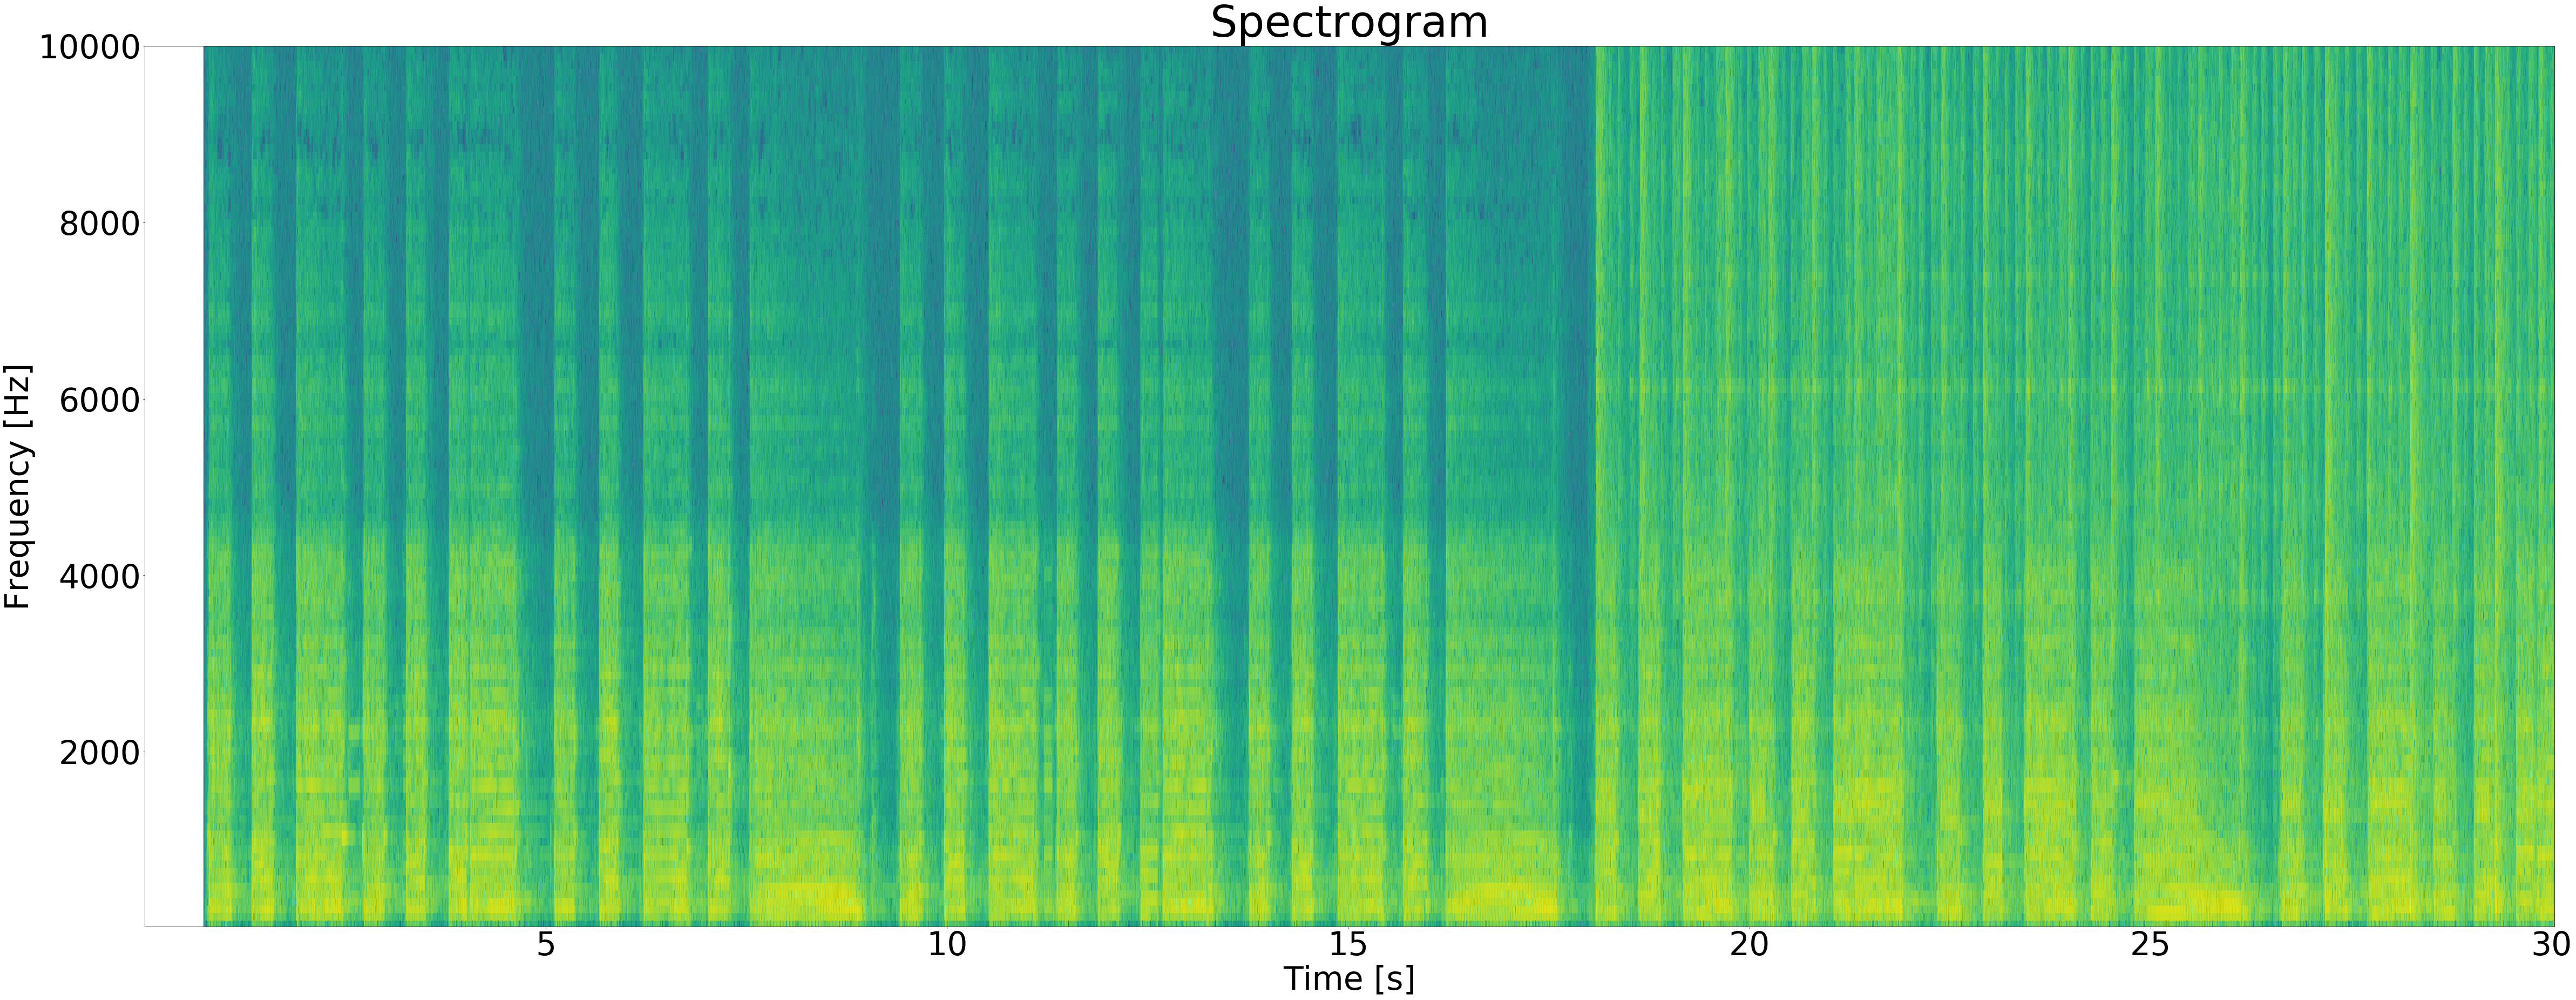

In [8]:
from scipy.io import wavfile

rate, music = wavfile.read('smoke_on_water.wav') # read the audio file

# create the spectogram figure
plt.figure(figsize=(80, 30)) # figure size
plt.title('Spectrogram', fontsize=80) # figure title
plt.specgram(music, Fs=rate) # create the spectogram
plt.ylim(20, 10000) # show from 20 Hz to 10 kHz
plt.xlabel('Time [s]', fontsize=60) # horizontal axis title
plt.ylabel('Frequency [Hz]', fontsize=60) # vertical axis title
plt.xticks(fontsize=60) # numbering font size
plt.yticks(fontsize=60)
plt.show()

In [9]:
from requests import get
from pattern3.web import plaintext

url = 'https://en.wikipedia.org/wiki/Deep_learning'

htmlText = get(url).text # read the html code
text = plaintext(htmlText) # counvert the html code to text
print(text)

Deep learning - Wikipedia

Deep learning

From Wikipedia, the free encyclopedia

Jump to navigationJump to search

For deep versus shallow learning in educational psychology, see Student approaches to learning. For more information, see Artificial neural network.

Branch of machine learning

Part of a series on
Machine learning
and
data mining

Problems

* Classification
* Clustering
* Regression
* Anomaly detection
* AutoML
* Association rules
* Reinforcement learning
* Structured prediction
* Feature engineering
* Feature learning
* Online learning
* Semi-supervised learning
* Unsupervised learning
* Learning to rank
* Grammar induction

Supervised learning
(classification • regression)

* Decision trees
* Ensembles
* Bagging
* Boosting
* Random forest

* k-NN
* Linear regression
* Naive Bayes
* Artificial neural networks
* Logistic regression
* Perceptron
* Relevance vector machine (RVM)
* Support vector machine (SVM)

Clustering

* BIRCH
* CURE
* Hierarchical
* k-means
* Expectatio

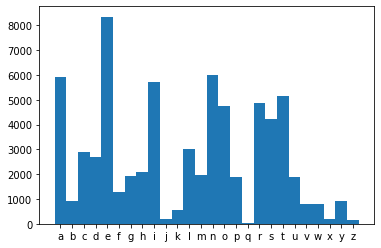

In [10]:
from collections import Counter
import re

text = re.sub('[^a-zA-Z]+', '', text) # delete all special characters from the text
text = text.lower() # lower all letters in the text
count = Counter(text) # count the number of letters in the text
labels, values = zip(*sorted(Counter(text).items())) # the letters and numbers into separated arrays
plt.bar(labels, values, 1) # create the histogram
plt.show()